In [1]:
import keypoint_moseq as kpms
import numpy as np
import os, shutil
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette
from scipy.spatial.distance import squareform
import pandas as pd
# import joblib

In [2]:
project_dir = r'R:\PBS\LiPatel_Labs\General\kmps\valen\withPorts'
config = lambda: kpms.load_config(project_dir)
model_name = '2025_04_07-16_29_59'

In [3]:
keypoint_data_path = project_dir + '/predictions/'
coordinates,confidences,bodyparts = kpms.load_keypoints(keypoint_data_path,'deeplabcut')

Loading keypoints: 100%|████████████████| 12/12 [00:11<00:00,  1.00it/s]


In [4]:
results = kpms.load_results(project_dir, model_name)


Saving to: R:\PBS\LiPatel_Labs\General\kmps\valen\withPorts\2025_04_07-16_29_59\similarity_dendrogram
Saving dendrogram plot to R:\PBS\LiPatel_Labs\General\kmps\valen\withPorts\2025_04_07-16_29_59\similarity_dendrogram


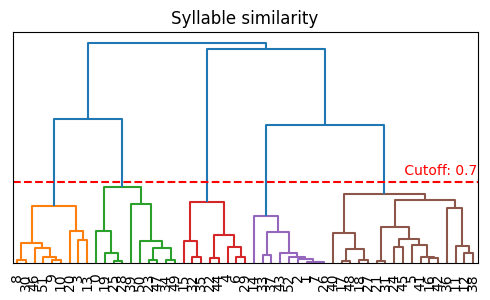

In [8]:
def plot_similarity_dendrogram(
    coordinates,
    results,
    project_dir=None,
    model_name=None,
    save_path=None,
    metric="cosine",
    pre=5,
    post=15,
    min_frequency=0.005,
    min_duration=3,
    bodyparts=None,
    use_bodyparts=None,
    density_sample=False,
    sampling_options={"n_neighbors": 50},
    figsize=(6, 3),
    cutoff_distance=0.7,  # Default cutoff distance for clustering
    **kwargs,
):
    save_path = kpms.io._get_path(project_dir, model_name, save_path, "similarity_dendrogram")

    
    cutoff_distance=0.7
    distances, syllable_ixs = kpms.syllable_similarity(
        coordinates,
        results,
        metric,
        pre,
        post,
        min_frequency,
        min_duration,
        bodyparts,
        use_bodyparts,
        density_sample,
        sampling_options,
    )

    Z = linkage(squareform(distances), "complete")
    clusters = fcluster(Z, cutoff_distance, criterion='distance')

    # Create a dictionary mapping each label to its cluster
    #labels = [f"Syllable {s}" for s in syllable_ixs]
    labels = syllable_ixs
    cluster_assignments = {label: cluster for label, cluster in zip(labels, clusters)} 
    cluster_df = pd.DataFrame(list(cluster_assignments.items()), columns=['Label', 'Cluster'])
    print(f"Saving to: {save_path}")
    cluster_df.to_csv(save_path + ".csv", index=False)
    
    # Plotting the dendrogram with a cutoff line
    fig, ax = plt.subplots(figsize=figsize)
    dn = dendrogram(Z, labels=labels, leaf_font_size=10, ax=ax, leaf_rotation=90, color_threshold=cutoff_distance)
    ax.axhline(y=cutoff_distance, color='r', linestyle='--')  # Cutoff line for visual clustering
    ax.text(x=ax.get_xlim()[1], y=cutoff_distance+0.1, s=f' Cutoff: {cutoff_distance}', 
            va='center', ha='right', color='red', fontsize=10)
    ax.set_yticks([])
    ax.set_title("Syllable similarity")
    fig.set_size_inches(figsize)

    print(f"Saving dendrogram plot to {save_path}")
    for ext in ["pdf", "png"]:
        plt.savefig(save_path + "." + ext)
    #plt.close(fig)   

    #return cluster_assignments


plot_similarity_dendrogram(coordinates, results, project_dir, model_name, **config())